# Work example 2: Steel structure vibration

![title](img/image_2.png)

In [1]:
# Dependencies
import numpy as np                  # Tools for math and working with array
import matplotlib.pyplot as plt     # Tools for plotting

# Constants
m = 10000   # Mass [kg]
xi = 0.02   # Damping ratio
P = 1500    # Force applied [N]
displacement = 7   # Initial displacement [mm]

### 1. Stiffness, $k$

\begin{equation}
k = \frac{P}{\delta}
\end{equation}

In [2]:
# Stiffness
k = P / (displacement / 1000)
print(f"Stiffness: {k: 0.3f} N/m")

Stiffness:  214285.714 N/m


### 2. Natural frequency, $\omega_n$ and $f_n$

\begin{equation}
\omega_n = \sqrt{\frac{k}{m}}
\end{equation}

\begin{equation}
f_n = \frac{\omega_n}{2\pi}
\end{equation}

In [3]:
# Natural frequency
omega_n = np.sqrt(k / m)
f_n = omega_n / (2 * np.pi)

print(f"Natural frequency: {omega_n: 0.3f} rad/s")
print(f"Frequency: {f_n: 0.3f} Hz")

Natural frequency:  4.629 rad/s
Frequency:  0.737 Hz


### 3. The oscillation period, $T$

\begin{equation}
T = \frac{1}{f_n}
\end{equation}

In [4]:
# The oscillation period
T = 1 / f_n
print(f"The oscillation period: {T: 0.3f} s")

The oscillation period:  1.357 s


### 4. The damping coefficient, $c$

\begin{equation}
c = 2\xi m \omega_n
\end{equation}

In [5]:
# The damping coefficient
c = 2 * xi * m * omega_n
print(f"The damping coeficcient: {c: 0.3f} N·s/m")

The damping coeficcient:  1851.640 N·s/m


### 5. The logaritmic decrement, $\delta$

\begin{equation}
\delta \approx 2\pi \xi
\end{equation}

In [6]:
# The logaritmic decrement
delta = 2 * np.pi * xi
print(f"The logaritmic decrement: {delta: 0.3f}")

The logaritmic decrement:  0.126


### 6. The damped natural frequency, $\omega_d$

\begin{equation}
\omega_d = \omega_n \sqrt{1-\xi^2}
\end{equation}

In [7]:
# The damped natural frequency
omega_d = omega_n * np.sqrt(1 - xi**2)
print(f"The damped natural frequency: {omega_d: 0.3f} rad/s")

The damped natural frequency:  4.628 rad/s


### 7. Number of oscillations cycle, $n$

\begin{equation}
\ln{\frac{u_1}{u_n}} = n\delta
\end{equation}

The number of oscillations before amplitude reduces to 0.001 m

In [8]:
# The number of oscillation
u_start = 0.007
u_finish = 0.001
n = np.log(u_start / u_finish) / delta
n_full = np.ceil(n)
t_full = T * n_full
print(f"Number of oscillations before amplitude reduces from 0.007 m to 0.001 m: {n_full:0.0f}")
print(f"Times to take the complete cycles: {t_full: 0.3f} s")

Number of oscillations before amplitude reduces from 0.007 m to 0.001 m: 16
Times to take the complete cycles:  21.717 s


### Free vibration response

\begin{equation}
u(t) = e^{-\xi \omega_n t}[A \sin{(\omega_d t)} + B \cos{(\omega_d t)}] \quad ... \quad  (a)
\end{equation}

Initial conditions:
\begin{equation}
u(t = 0) = 0.007 \quad m
\end{equation}

\begin{equation}
\dot{u}(t = 0) = 0 \quad m/s
\end{equation}

Velocity expression
\begin{equation}
\dot{u}(t) = A [e^{-\xi \omega_n t} \omega_d \cos{(\omega_d t)} - \xi \omega_n \sin{(\omega_d t)}e^{-\xi \omega_n t}] +
            B [-e^{-\xi \omega_n t} \omega_d \sin{(\omega_d t)} - \xi \omega_n \cos{(\omega_d t)}e^{-\xi \omega_n t}]
            \quad ... \quad  (b)
\end{equation}

Resolving (a) and (b):
\begin{equation}
A = 0.00014
\end{equation}

\begin{equation}
B = 0.007
\end{equation}

Therefore, the vibration response is given by:

\begin{equation}
u(t) = e^{-\xi \omega_n t}[0.00014 \sin{(\omega_d t)} + 0.007 \cos{(\omega_d t)}]
\end{equation}

### Plot the response

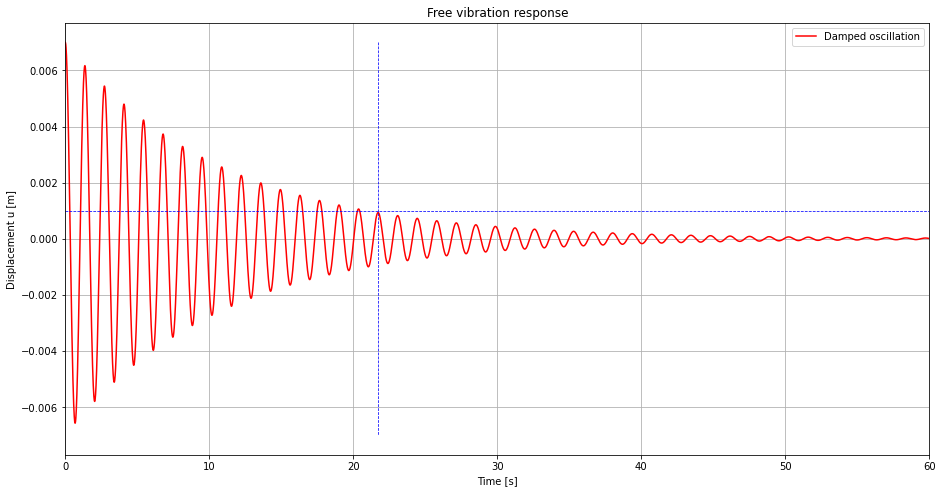

In [9]:
# Vector of time data
t_max = 60                          # The maximum time [s]
delta_t = 0.01                      # Timestep [s]
nPoints = int(t_max / delta_t)      # Number of point -> int
t = np.linspace(0, t_max, nPoints)  # Time vector [s]

# Displacemente vector
u = np.exp(-xi * omega_n * t) * (0.00014 * np.sin(omega_d * t) + 0.007 * np.cos(omega_d * t))

# Plotting
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 2, 1.5])
axes.plot(t, u, "r", label="Damped oscillation")
axes.plot([0, t_max], [u_finish, u_finish], "b--", lw=0.75)
axes.plot([t_full, t_full], [u_start, -u_start], "b--", lw=0.75)
axes.set_xlim([0, t_max])
axes.legend()
axes.grid()
axes.set_title("Free vibration response")
axes.set_xlabel("Time [s]")
axes.set_ylabel("Displacement u [m]")
plt.show()